In [1]:
import os
import sys
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# to get deterministic output
#torch.manual_seed(123)

sys.path.append(os.path.abspath(".."))

### Hyperparameters

In [2]:
batch_size = 128
lr = 0.0002
latent_dim = 100
epochs = 50
image_size = 32
channels = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### DataLoader

In [3]:
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # normalize to [-1, 1]
])

train_ds = datasets.CIFAR10(root="../datasets/cifar10", train=True, download=True, transform=transform)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

print("Train set:", len(train_ds))

Train set: 50000


### Visualize the Dataset

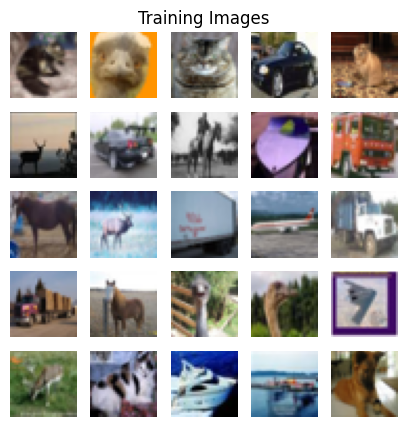

In [4]:
for images, _ in train_loader:  
    break

grid = images * 0.5 + 0.5  # denormalize
grid = grid.numpy().transpose(0, 2, 3, 1)

plt.figure(figsize=(5,5))
plt.title("Training Images")
plt.axis("off")
for k in range(25):
    plt.subplot(5,5,k+1)
    plt.imshow(grid[k], cmap="gray")
    plt.axis("off")
plt.show()

### Generator Model

In [5]:
class Generator(nn.Module):
    def __init__(self, latent_dim, channels):
        super().__init__()
        self.net = nn.Sequential(
            # input: latent_dim x 1 x 1
            nn.ConvTranspose2d(latent_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)

### Discriminator Model

In [6]:
class Discriminator(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(channels, 128, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.net(img).view(-1, 1)

### Training Loop

In [7]:
generator = Generator(latent_dim, channels).to(device)
discriminator = Discriminator(channels).to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

Epoch: 001/050 | d_loss: 0.1993 | g_loss: 2.5714
Epoch: 002/050 | d_loss: 0.1821 | g_loss: 2.4695
Epoch: 003/050 | d_loss: 0.2374 | g_loss: 1.9646
Epoch: 004/050 | d_loss: 0.1733 | g_loss: 2.9033
Epoch: 005/050 | d_loss: 0.1853 | g_loss: 2.1843
Epoch: 006/050 | d_loss: 0.2426 | g_loss: 1.6952
Epoch: 007/050 | d_loss: 0.1516 | g_loss: 3.2154
Epoch: 008/050 | d_loss: 0.2935 | g_loss: 1.2087
Epoch: 009/050 | d_loss: 0.1793 | g_loss: 2.1121
Epoch: 010/050 | d_loss: 0.1032 | g_loss: 2.3766


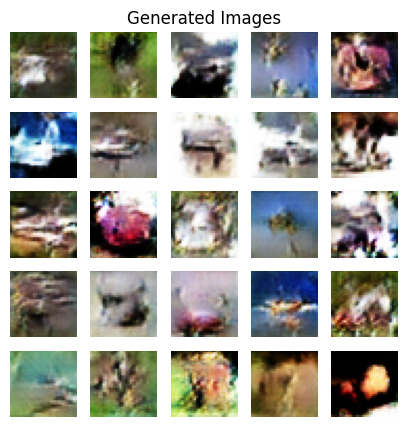

Epoch: 011/050 | d_loss: 0.0977 | g_loss: 2.9366
Epoch: 012/050 | d_loss: 0.0763 | g_loss: 4.0896
Epoch: 013/050 | d_loss: 0.2441 | g_loss: 2.0299
Epoch: 014/050 | d_loss: 0.0627 | g_loss: 3.3048
Epoch: 015/050 | d_loss: 0.4999 | g_loss: 0.8670
Epoch: 016/050 | d_loss: 1.3449 | g_loss: 8.9888
Epoch: 017/050 | d_loss: 0.4306 | g_loss: 4.0046
Epoch: 018/050 | d_loss: 0.0717 | g_loss: 2.5857
Epoch: 019/050 | d_loss: 0.0968 | g_loss: 3.7635
Epoch: 020/050 | d_loss: 0.1727 | g_loss: 2.1533


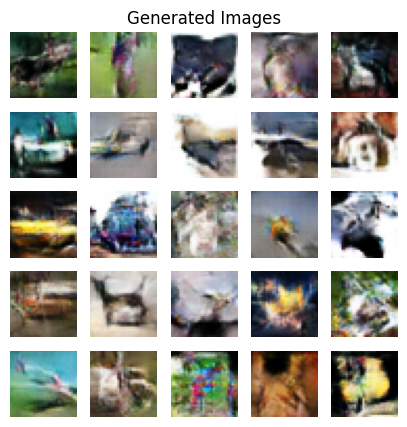

Epoch: 021/050 | d_loss: 0.2579 | g_loss: 3.3690
Epoch: 022/050 | d_loss: 0.3331 | g_loss: 1.1811
Epoch: 023/050 | d_loss: 0.0402 | g_loss: 3.7692
Epoch: 024/050 | d_loss: 0.0785 | g_loss: 4.8664
Epoch: 025/050 | d_loss: 0.0874 | g_loss: 2.8132
Epoch: 026/050 | d_loss: 0.1186 | g_loss: 3.5178
Epoch: 027/050 | d_loss: 0.0726 | g_loss: 3.6022
Epoch: 028/050 | d_loss: 0.4445 | g_loss: 5.0408
Epoch: 029/050 | d_loss: 0.1054 | g_loss: 3.8871
Epoch: 030/050 | d_loss: 0.0467 | g_loss: 3.2359


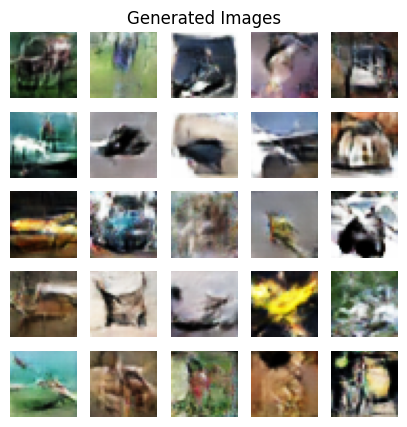

Epoch: 031/050 | d_loss: 0.0755 | g_loss: 3.1552
Epoch: 032/050 | d_loss: 0.1585 | g_loss: 2.1014
Epoch: 033/050 | d_loss: 0.3544 | g_loss: 3.5860
Epoch: 034/050 | d_loss: 0.0879 | g_loss: 4.3481
Epoch: 035/050 | d_loss: 0.1698 | g_loss: 3.4698
Epoch: 036/050 | d_loss: 0.1422 | g_loss: 2.1058
Epoch: 037/050 | d_loss: 0.1895 | g_loss: 1.7498
Epoch: 038/050 | d_loss: 0.1604 | g_loss: 3.7345
Epoch: 039/050 | d_loss: 0.0441 | g_loss: 6.0025
Epoch: 040/050 | d_loss: 0.1078 | g_loss: 3.1496


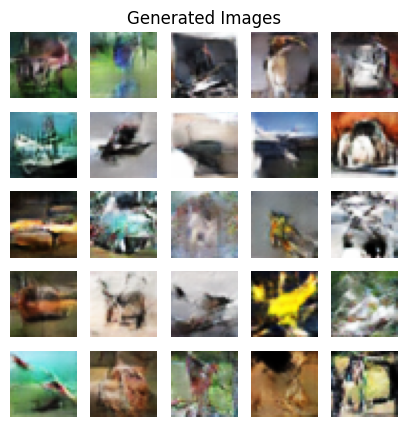

Epoch: 041/050 | d_loss: 0.0978 | g_loss: 2.7320
Epoch: 042/050 | d_loss: 0.0940 | g_loss: 2.6340
Epoch: 043/050 | d_loss: 0.1453 | g_loss: 3.8012
Epoch: 044/050 | d_loss: 0.0889 | g_loss: 4.1022
Epoch: 045/050 | d_loss: 0.0635 | g_loss: 4.6858
Epoch: 046/050 | d_loss: 0.8312 | g_loss: 6.8289
Epoch: 047/050 | d_loss: 0.1547 | g_loss: 2.1293
Epoch: 048/050 | d_loss: 0.3509 | g_loss: 3.3199
Epoch: 049/050 | d_loss: 0.0677 | g_loss: 3.1587
Epoch: 050/050 | d_loss: 0.3015 | g_loss: 5.1411


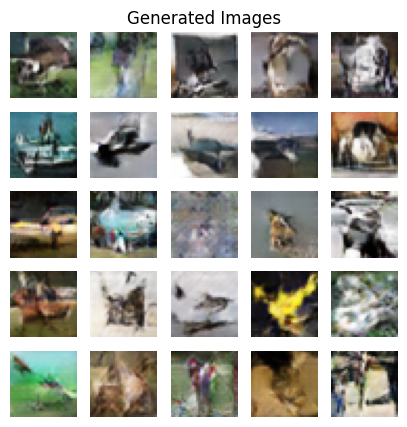

In [8]:
fixed_noise = torch.randn(64, latent_dim, 1, 1, device=device)

for epoch in range(epochs):
    for i, (imgs, _) in enumerate(train_loader):
        real_imgs = imgs.to(device)
        batch_size = real_imgs.size(0)

        # Labels
        valid = torch.ones(batch_size, 1, device=device)
        fake = torch.zeros(batch_size, 1, device=device)

        # -----------------
        # Train Generator
        # -----------------
        optimizer_G.zero_grad()

        z = torch.randn(batch_size, latent_dim, 1, 1, device=device)
        gen_imgs = generator(z)

        g_loss = criterion(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        # Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()

        real_loss = criterion(discriminator(real_imgs), valid)
        fake_loss = criterion(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

    print(f"Epoch: {epoch+1:03d}/{epochs:03d} | "
          f"d_loss: {d_loss.item():.4f} | g_loss: {g_loss.item():.4f}")

    # Show generated images every 10 epochs
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            gen_imgs = generator(fixed_noise).cpu()
        grid = gen_imgs * 0.5 + 0.5  # denormalize
        grid = grid.numpy().transpose(0, 2, 3, 1)

        plt.figure(figsize=(5,5))
        plt.title("Generated Images")
        plt.axis("off")
        for k in range(25):
            plt.subplot(5,5,k+1)
            plt.imshow(grid[k])
            plt.axis("off")
        plt.show()
